In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
%matplotlib inline

# 150 Evals

In [79]:
best_results = {'25evals': defaultdict(list),
                '50evals': defaultdict(list),
                'final': defaultdict(list)}
best_results_test = {'25evals': defaultdict(list),
                '50evals': defaultdict(list),
                'final': defaultdict(list)}
method_map = {'nei':'BoTorch-qNEI',
              'gs': 'GS-3,6,9',
              'gs_sampling': 'GS-3,6,9-s',
              'ei': 'BO-1',
              'lcb': 'GPyOpt-LCB',
              'lcb_logregret': 'GPyOpt-LCB(log(Regret))',
              'rs':'RS-1',
              'rs3': 'Random Search x3',
              'rs5': 'Random Search x5',
              'ei3': 'GPyOpt-EI x3',
              'ei5': 'GPyOpt-EI x5',
              'nei_logregret':'BoTorch-qNEI(log(Regret))',
              'asha':'ASHA'}

skip_results = ["gs-20201006", "gs-20201007"]
evals_used = defaultdict(list)
for fname in os.listdir("results/"):
    if any(fname.startswith(n) for n in skip_results):
        continue
    if fname.endswith(".csv"):
        method_name = method_map[fname.split("-")[0]]
        if fname.split("-")[0] == 'nei_logregret':
            continue
        evals = fname.split("_")[-1][:-4]
        df = pd.read_csv(f"results/{fname}")
        if 'evals' in df.columns:
            evals_used[method_name].append(df['evals'].mean())
        best_results[evals][method_name].append(np.mean(df['mean_reward']))

In [80]:
np.mean(evals_used['GS-3,6,9'])

187.4

In [81]:
np.mean(evals_used['GS-3,6,9-s'])

181.0

In [74]:
validdf = pd.concat([pd.DataFrame({'Method': [k]*len(v), 'EPE':v}) for k, v in best_results['final'].items()]).sort_values(by='Method')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

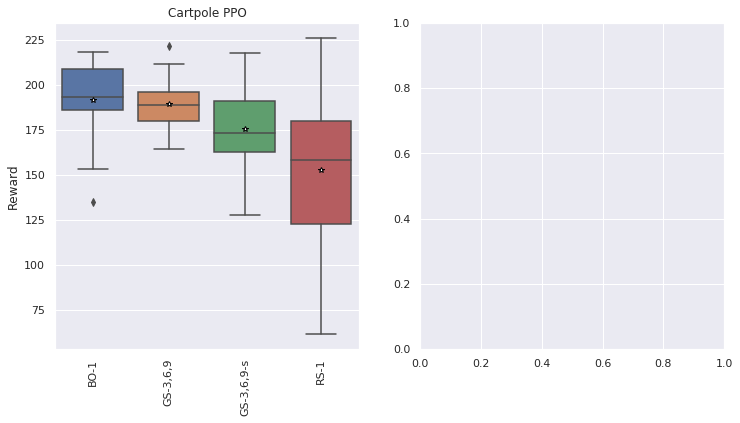

In [78]:
sns.set()
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

sns.boxplot(data=validdf,
            x='Method',
            y='EPE',
            ax=ax[0],
            showmeans=True,
            meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black"})
ax[0].set_title("Cartpole PPO")
ax[0].set_xlabel("")
ax[0].set_ylabel("Reward")
# ax[0].set_ylim([7, 20])

plt.sca(ax[0])
plt.xticks(rotation=90)


In [77]:
validdf.to_csv('../csv-results/cartpole-valid.csv')

In [58]:
validdf.groupby('method').agg(['count', 'mean', 'median', 'var']).sort_values(by=('value', 'mean'), ascending=True)

value                                     
                  count        mean      median          var
method                                                      
Random Search        15  166.714064  169.333780  1648.746522
GroupSeq-Sampling    15  175.484499  173.441351   725.476348
GroupSeq             15  189.361816  188.755213   227.396131
GPyOpt-EI            15  199.281514  203.848225   241.239680

In [152]:
meandf = pd.DataFrame({'25': df25.groupby('method').agg(['mean'])['value']['mean'],
                       '50': df50.groupby('method').agg(['mean'])['value']['mean'],
                       '100': finaldf.groupby('method').agg(['mean'])['value']['mean']})

In [164]:
meandf = meandf.reindex(['25', '50', '100'], axis=1)

In [165]:
print(meandf.to_latex(float_format=lambda x: '%.1f' % x))

\begin{tabular}{lrrr}
\toprule
{} &    25 &    50 &   100 \\
method           &       &       &       \\
\midrule
ASHA             & 125.2 & 135.0 & 134.4 \\
BoTorch-qNEI     & 149.7 & 155.2 & 158.3 \\
GPyOpt-EI        & 136.5 & 143.6 & 148.5 \\
GPyOpt-EI x3     &  93.7 & 133.5 & 151.9 \\
GPyOpt-LCB       & 141.1 & 149.7 & 148.7 \\
Random Search    & 112.0 & 130.3 & 139.1 \\
Random Search x3 &  85.6 & 102.6 & 123.0 \\
Random Search x5 &  69.6 &  89.1 & 105.7 \\
\bottomrule
\end{tabular}

